# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 36
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | This flight failed at every le...
1,Not Verified | Beware of British Airways and ...
2,✅ Trip Verified | I flew from Cairo to Heathr...
3,"Not Verified | I flew with numerous airlines, ..."
4,✅ Trip Verified | We were traveling as a fami...


In [6]:
df.to_csv("c:/users/kamalesh k b/Downloads/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [15]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | This flight failed at every le...
1,Not Verified | Beware of British Airways and ...
2,✅ Trip Verified | I flew from Cairo to Heathr...
3,"Not Verified | I flew with numerous airlines, ..."
4,✅ Trip Verified | We were traveling as a fami...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3576 non-null   object
dtypes: object(1)
memory usage: 28.1+ KB


In [17]:
df.describe()

,reviews
count,3576
unique,3564
top,Flew from LAX-LHR on BA's new A380. The crew a...
freq,2


In [18]:
df.shape

(3576, 1)

In [19]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [20]:
df.head()

,reviews
0,This flight failed at every level. We were d...
1,Beware of British Airways and their marketin...
2,I flew from Cairo to Heathrow on what they c...
3,"I flew with numerous airlines, but I gotta ad..."
4,We were traveling as a family (5 people). Be...


In [21]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,This flight failed at every level. We were d...,This flight failed at every level We were del...
1,Beware of British Airways and their marketin...,Beware of British Airways and their marketing...
2,I flew from Cairo to Heathrow on what they c...,I flew from Cairo to Heathrow on what they ca...
3,"I flew with numerous airlines, but I gotta ad...",I flew with numerous airlines but I gotta adm...
4,We were traveling as a family (5 people). Be...,We were traveling as a family people Because ...


In [22]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to C:\Users\kamalesh k
[nltk_data]     b\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\kamalesh k
[nltk_data]     b\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\kamalesh k
[nltk_data]     b\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\kamalesh k
[nltk_data]     b\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kamalesh k b\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,This flight failed at every level. We were d...,This flight failed at every level We were del...,"[(flight, n), (failed, v), (every, None), (lev..."
1,Beware of British Airways and their marketin...,Beware of British Airways and their marketing...,"[(Beware, n), (British, n), (Airways, n), (mar..."
2,I flew from Cairo to Heathrow on what they c...,I flew from Cairo to Heathrow on what they ca...,"[(flew, v), (Cairo, n), (Heathrow, v), (call, ..."
3,"I flew with numerous airlines, but I gotta ad...",I flew with numerous airlines but I gotta adm...,"[(flew, v), (numerous, a), (airlines, n), (got..."
4,We were traveling as a family (5 people). Be...,We were traveling as a family people Because ...,"[(traveling, v), (family, n), (people, n), (ac..."


In [24]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,This flight failed at every level. We were d...,This flight failed at every level We were del...,"[(flight, n), (failed, v), (every, None), (lev...",flight fail every level delay arrive destina...
1,Beware of British Airways and their marketin...,Beware of British Airways and their marketing...,"[(Beware, n), (British, n), (Airways, n), (mar...",Beware British Airways marketing make believ...
2,I flew from Cairo to Heathrow on what they c...,I flew from Cairo to Heathrow on what they ca...,"[(flew, v), (Cairo, n), (Heathrow, v), (call, ...",fly Cairo Heathrow call euro club class cram...
3,"I flew with numerous airlines, but I gotta ad...",I flew with numerous airlines but I gotta adm...,"[(flew, v), (numerous, a), (airlines, n), (got...",fly numerous airline get ta admit British Ai...
4,We were traveling as a family (5 people). Be...,We were traveling as a family people Because ...,"[(traveling, v), (family, n), (people, n), (ac...",travel family people accident airport arrive...


In [25]:
df[['reviews','Lemma']]

,reviews,Lemma
0,This flight failed at every level. We were d...,flight fail every level delay arrive destina...
1,Beware of British Airways and their marketin...,Beware British Airways marketing make believ...
2,I flew from Cairo to Heathrow on what they c...,fly Cairo Heathrow call euro club class cram...
3,"I flew with numerous airlines, but I gotta ad...",fly numerous airline get ta admit British Ai...
4,We were traveling as a family (5 people). Be...,travel family people accident airport arrive...
...,...,...
3571,None,None
3572,None,None
3573,None,None
3574,None,None


In [26]:
!pip install vaderSentiment

In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,This flight failed at every level. We were d...,This flight failed at every level We were del...,"[(flight, n), (failed, v), (every, None), (lev...",flight fail every level delay arrive destina...,0.8130,Positive
1,Beware of British Airways and their marketin...,Beware of British Airways and their marketing...,"[(Beware, n), (British, n), (Airways, n), (mar...",Beware British Airways marketing make believ...,0.2491,Neutral
2,I flew from Cairo to Heathrow on what they c...,I flew from Cairo to Heathrow on what they ca...,"[(flew, v), (Cairo, n), (Heathrow, v), (call, ...",fly Cairo Heathrow call euro club class cram...,-0.7717,Negative
3,"I flew with numerous airlines, but I gotta ad...",I flew with numerous airlines but I gotta adm...,"[(flew, v), (numerous, a), (airlines, n), (got...",fly numerous airline get ta admit British Ai...,0.4215,Neutral
4,We were traveling as a family (5 people). Be...,We were traveling as a family people Because ...,"[(traveling, v), (family, n), (people, n), (ac...",travel family people accident airport arrive...,0.5267,Positive


In [28]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Neutral     1751
Positive    1075
Negative     750
Name: Analysis, dtype: int64

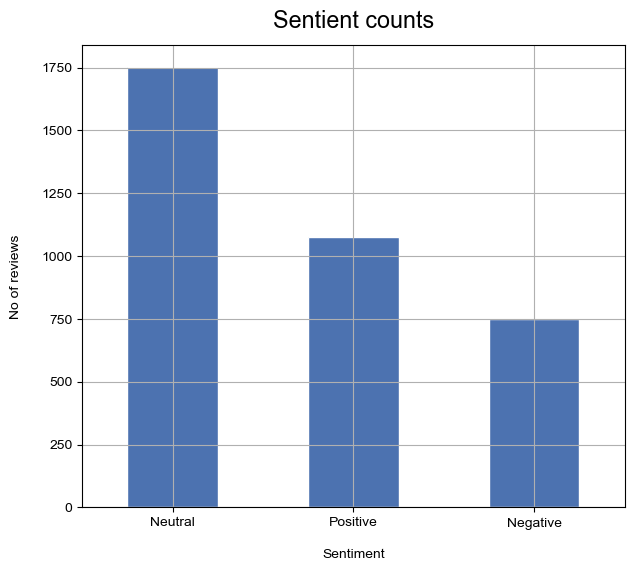

In [37]:
import seaborn as sns 
df['Analysis'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
df['Analysis'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("No of reviews", labelpad=14)
plt.title("Sentient counts", y=1.02);

([<matplotlib.patches.Wedge at 0x27f5ce008e0>,
 [Text(0.03639956728747391, 1.1194083577949938, 'Neutral'),
  Text(-0.7141271795963738, -0.8627991489111059, 'Positive'),
  Text(0.8855522309955638, -0.6857093015110557, 'Negative')],
 [Text(0.020149760462708773, 0.6196724837793715, '49.0%'),
  Text(-0.39532040299084975, -0.47762095743293354, '30.1%'),
  Text(0.4902164135868299, -0.3795890776221915, '21.0%')])

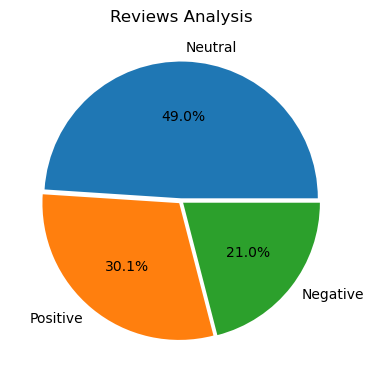

In [36]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.02, 0.02, 0.02), autopct='%1.1f%%', shadow=False)

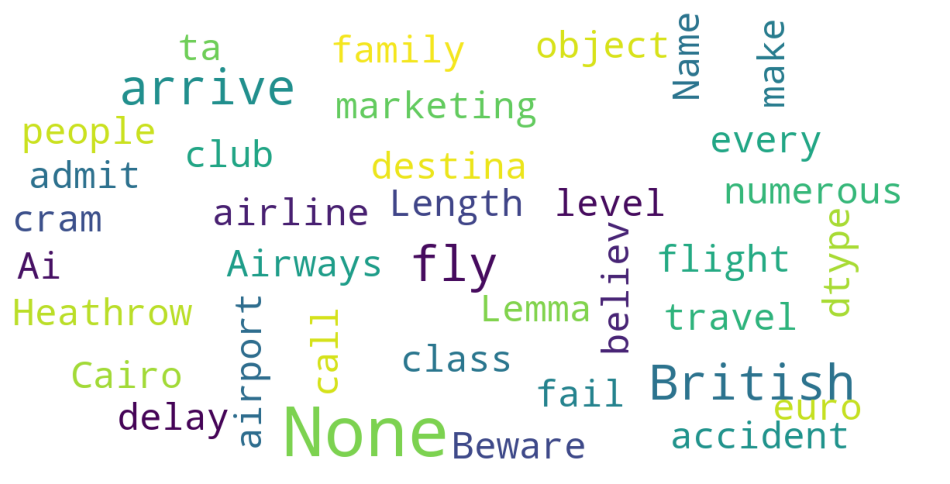

In [45]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df.Lemma)